In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [205]:
file_name = 'german.data'
trgt = 'class'

In [206]:
#reading the data from CSV
#note: the data was space seperated without header
credit_data = pd.read_csv(file_name, header=None, delimiter=r"\s+")
credit_data.shape

(1000, 21)

In [207]:
#adding header to the data frame
credit_data.columns = ['account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker','class']

cols = list(credit_data.columns)
#print(cols[:-1])

In [208]:
credit_data.info()
credit_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000 non-null object
people_under_maintenance      100

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [211]:
#fixing the target varaible value
credit_data['class'] =credit_data['class']-1
credit_data['class'].head()
#credit_data['class'].describe()

0    0
1    1
2    0
3    0
4    1
Name: class, dtype: int64

In [212]:
#function to calculate the information value of a feature
'''
Information Value = ln(%good / %bad)*(%good - %bad)
<0.02     Useless for prediction
0.02-0.1  Weak Predictor
0.1-0.3   Mediue Predictor
0.3-0.5   Strong Predictor
>0.5      Suspicious or too good Predictor
'''
def InfoVal(data,var):
    aggr = ['count','sum']
    c = ['total','bad','bad_per','good','good_per','InfoVal']
    
    df = data.groupby([var])[trgt].agg(aggr)
    df.columns = c[:2]     
    df[c[2]] = df[c[1]]/df[c[1]].sum()
    
    df[c[3]] = df[c[0]] - df[c[1]] 
    df[c[4]] = df[c[3]]/df[c[3]].sum()
    
    df[c[5]] = (df[c[4]]-df[c[2]])*np.log(df[c[4]]/df[c[2]])
    
    return df
    
def InfoValHelper(data,var):
    if data[var].dtypes == 'object':
        return InfoVal(data,var)
    else:
        #create bins
        data['bin_vars']=pd.qcut(data[var].rank(method='first'),10)
        return InfoVal(data,'bin_vars')

In [213]:
#print(InfoValHelper(credit_data,'credit_history'))
#print(InfoValHelper(credit_data,'duration_in_month'))
#data.head()
#credit_data.head()

                total  bad   bad_per  good  good_per   InfoVal
credit_history                                                
A30                40   25  0.083333    15  0.021429  0.084074
A31                49   28  0.093333    21  0.030000  0.071882
A32               530  169  0.563333   361  0.515714  0.004206
A33                88   28  0.093333    60  0.085714  0.000649
A34               293   50  0.166667   243  0.347143  0.132423


In [23]:
#get information values for all cols
iv_list = []
for col in cols[:-1]:
    dt = InfoValHelper(credit_data,col)
    iv_val = round(dt['InfoVal'].sum(),3)
    dt_type = credit_data[col].dtypes
    iv_list.append((iv_val,col,dt_type))
iv_list.sort(reverse=True)    

for i in iv_list:
    print (i[0],",",i[1],",type =",i[2])

0.666 , account_check_status ,type = object
0.293 , credit_history ,type = object
0.261 , duration_in_month ,type = int64
0.196 , savings ,type = object
0.169 , purpose ,type = object
0.113 , property ,type = object
0.113 , credit_amount ,type = int64
0.103 , age ,type = int64
0.098 , credits_this_bank ,type = int64
0.086 , present_emp_since ,type = object
0.083 , housing ,type = object
0.062 , installment_as_income_perc ,type = int64
0.058 , other_installment_plans ,type = object
0.049 , present_res_since ,type = int64
0.045 , personal_status_sex ,type = object
0.044 , foreign_worker ,type = object
0.034 , people_under_maintenance ,type = int64
0.032 , other_debtors ,type = object
0.009 , job ,type = object
0.006 , telephone ,type = object


In [24]:
#select first 15 values based of IV, and seperate into categorical and discrete vars
cols_new_cat = []#cateogrical
cols_new_dis = []#continious
for i in iv_list[:15]:
    if i[2] == 'object':
        cols_new_cat.append(i[1])   
    else:
        cols_new_dis.append(i[1])   
    
print(cols_new_cat)
print(cols_new_dis)

['account_check_status', 'credit_history', 'savings', 'purpose', 'property', 'present_emp_since', 'housing', 'other_installment_plans', 'personal_status_sex']
['duration_in_month', 'credit_amount', 'age', 'credits_this_bank', 'installment_as_income_perc', 'present_res_since']


In [25]:
#create dummy fields for categorical features and add to new df
df_new = pd.DataFrame()
for col in cols_new_cat:
    pfx = col
    last_col = pfx + '_' + sorted(list(credit_data[col].unique()))[-1]
    #print(col)
    dummy_temp = pd.get_dummies(credit_data[col], prefix=pfx)
    #drop the last column
    dummy_temp.drop(last_col, inplace=True, axis=1)     
    #append to df    
    df_new = pd.concat([df_new,dummy_temp],axis=1,sort=False)
    
df_new.head()

,account_check_status_A11,account_check_status_A12,account_check_status_A13,credit_history_A30,credit_history_A31,credit_history_A32,credit_history_A33,savings_A61,savings_A62,savings_A63,...,present_emp_since_A72,present_emp_since_A73,present_emp_since_A74,housing_A151,housing_A152,other_installment_plans_A141,other_installment_plans_A142,personal_status_sex_A91,personal_status_sex_A92,personal_status_sex_A93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
3,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [26]:
#adding the continous var and class to new df
df_new = pd.concat([df_new,credit_data[cols_new_dis],credit_data['class']],axis=1,sort=False)
df_new.shape

(1000, 41)

In [27]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(df_new.drop(['class'],axis=1),df_new['class'],
                                                 train_size=0.7,random_state=42)

C:\Users\sheno\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
#applying the logit function
#install if not present
#!pip install statsmodels -U

import statsmodels.api as sm

In [30]:
logistic_model = sm.Logit(y_train,sm.add_constant(x_train)).fit()
print(logistic_model.summary())

C:\Users\sheno\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.459405
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  700
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           40
Date:                Tue, 14 May 2019   Pseudo R-squ.:                  0.2464
Time:                        10:35:46   Log-Likelihood:                -321.58
converged:                       True   LL-Null:                       -426.75
                                        LLR p-value:                 5.512e-25
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.4819      1.128     -3.088      0.002

In [39]:
#calculate the VIF(Variance Inflation Factor) to check multi-collinearity
cols = x_train.columns
vif_list=[]
for i in cols:    
    model = sm.OLS(x_train[i],sm.add_constant(x_train.drop([i],axis=1)))
    res = model.fit()    
    vif = 1/(1-res.rsquared)
    vif_list.append((round(vif,3),i))
    
vif_list.sort(reverse=True)
vif_list

C:\Users\sheno\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[(6.46, 'housing_A152'),
 (5.465, 'property_A123'),
 (5.346, 'property_A121'),
 (5.081, 'housing_A151'),
 (4.73, 'property_A122'),
 (3.713, 'personal_status_sex_A93'),
 (3.447, 'purpose_A43'),
 (3.335, 'personal_status_sex_A92'),
 (3.219, 'purpose_A40'),
 (2.69, 'purpose_A42'),
 (2.465, 'credit_amount'),
 (2.235, 'purpose_A41'),
 (2.025, 'credit_history_A32'),
 (2.013, 'duration_in_month'),
 (1.955, 'present_emp_since_A73'),
 (1.891, 'savings_A61'),
 (1.86, 'present_emp_since_A72'),
 (1.666, 'present_emp_since_A74'),
 (1.591, 'purpose_A46'),
 (1.563, 'personal_status_sex_A91'),
 (1.562, 'credits_this_bank'),
 (1.5, 'savings_A62'),
 (1.483, 'age'),
 (1.48, 'account_check_status_A11'),
 (1.388, 'account_check_status_A12'),
 (1.376, 'credit_history_A31'),
 (1.336, 'present_res_since'),
 (1.331, 'installment_as_income_perc'),
 (1.331, 'credit_history_A33'),
 (1.322, 'savings_A63'),
 (1.316, 'present_emp_since_A71'),
 (1.3, 'purpose_A45'),
 (1.28, 'credit_history_A30'),
 (1.273, 'savings_A6

In [45]:
#calculate the c-statistic to check the model
y_pred = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train)))
y_pred.columns = ['Probability']
y_train_pred = pd.concat([y_train,y_pred],axis=1,sort=False)

zeros = y_train_pred[y_train_pred['class']==0]
ones = y_train_pred[y_train_pred['class']==1]


C:\Users\sheno\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
def df_crossjoin(df1,df2,**kwargs):
    df1['_tmpkey']=1
    df2['_tmpkey']=1
    res = pd.merge(df1,df2,on='_tmpkey').drop('_tmpkey',axis=1)
    res.index = pd.MultiIndex.from_product((df1.index,df2.index))
    df1.drop(['_tmpkey'],axis=1,inplace=True)
    df2.drop(['_tmpkey'],axis=1,inplace=True)
    return res

In [55]:
joined_data = df_crossjoin(ones,zeros)
joined_data.head()

C:\Users\sheno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sheno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sheno\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

class_x  Probability_x  class_y  Probability_y
949 541        1       0.086482        0       0.216985
    440        1       0.086482        0       0.203844
    482        1       0.086482        0       0.314824
    422        1       0.086482        0       0.078792
    778        1       0.086482        0       0.021980

In [58]:
'''
A pair is concordant if the probability against the class 1 is higher than the class 0 and
discordant if the probability against the class 1 is less than the class 0. 
If both probabilities are same, we put them in the tied pair category. 
The higher the number of concordant pairs is, the better the model is!
c_statistic = 0.5 + (p_conc - p_disc)/2.0
valiue should be higher than 0.7
'''
joined_data['concordant_pair'] = 0
joined_data['discordant_pair'] = 0
joined_data['tied_pair'] = 0

joined_data.loc[joined_data['Probability_x'] > joined_data['Probability_y'],'concordant_pair'] =1
joined_data.loc[joined_data['Probability_x'] < joined_data['Probability_y'],'discordant_pair'] =1
joined_data.loc[joined_data['Probability_x'] == joined_data['Probability_y'],'tied_pair'] =1

p_conc = (sum(joined_data['concordant_pair'])*1.0)/joined_data.shape[0]
p_disc = (sum(joined_data['discordant_pair'])*1.0)/joined_data.shape[0]
print('p_conc:',p_conc)
print('p_disc:',p_disc)

c_stat = 0.5 + (p_conc-p_disc)/2
print('c_stat:',c_stat)


p_conc: 0.8215632582660131
p_disc: 0.17843674173398688
c_stat: 0.8215632582660131


In [72]:
col_pvals = logistic_model.pvalues
col_pvals = round(col_pvals,4)
col_pvals = col_pvals.sort_values(ascending=False)
col_pvals

savings_A63                     0.9955
personal_status_sex_A92         0.9420
purpose_A44                     0.9380
purpose_A45                     0.9093
present_res_since               0.7977
housing_A151                    0.7938
housing_A152                    0.6794
personal_status_sex_A91         0.6680
present_emp_since_A74           0.6531
present_emp_since_A71           0.5719
savings_A64                     0.5636
present_emp_since_A73           0.5270
purpose_A410                    0.4888
present_emp_since_A72           0.4327
property_A122                   0.4095
other_installment_plans_A142    0.3779
savings_A62                     0.3483
property_A123                   0.3194
personal_status_sex_A93         0.2797
purpose_A48                     0.2626
credit_history_A33              0.2503
purpose_A46                     0.2273
account_check_status_A13        0.2148
purpose_A42                     0.2120
purpose_A43                     0.1802
purpose_A40              

In [199]:
def cal_vif(X):
    cols = X.columns
    vif_list=[]
    for i in cols:    
        model = sm.OLS(X[i],sm.add_constant(X.drop([i],axis=1)))
        res = model.fit()    
        vif = 1/(1-res.rsquared)
        vif_list.append((round(vif,3),i))

    vif_list.sort(reverse=True)
    return vif_list
    
def cal_cstat(y_train,y_pred,var):    
    y_pred.columns = ['Probability']
    
    y_train_pred = pd.concat([y_train,y_pred],axis=1,sort=False)
    zeros = y_train_pred[y_train_pred[var]==0]
    ones = y_train_pred[y_train_pred[var]==1]
    
    joined_data = df_crossjoin(ones,zeros)
    
    joined_data['concordant_pair'] = 0
    joined_data['discordant_pair'] = 0
    joined_data['tied_pair'] = 0

    joined_data.loc[joined_data['Probability_x'] > joined_data['Probability_y'],'concordant_pair'] =1
    joined_data.loc[joined_data['Probability_x'] < joined_data['Probability_y'],'discordant_pair'] =1
    joined_data.loc[joined_data['Probability_x'] == joined_data['Probability_y'],'tied_pair'] =1

    p_conc = (sum(joined_data['concordant_pair'])*1.0)/joined_data.shape[0]
    p_disc = (sum(joined_data['discordant_pair'])*1.0)/joined_data.shape[0]
    c_stat = 0.5 + (p_conc-p_disc)/2
    
    return p_conc,p_disc,c_stat

def get_pred_summary(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
    log_model = sm.Logit(y_train,sm.add_constant(x_train)).fit()    
    y_pred = pd.DataFrame(log_model.predict(sm.add_constant(x_train)))    
    
    pvals = log_model.pvalues
    pvals = round(pvals,4)
    pvals = pvals.sort_values(ascending=False)
    
    vif = cal_vif(X)
    vif_df = pd.DataFrame(vif,columns=['vif','fields'])
    pval_df = pd.DataFrame(pval,columns=['pval'])
    pval_df.reset_index(inplace=True)
    pval_df.rename(columns={'index':'fields'},inplace=True)
    summary = pd.merge(pval_df,vif_df,on='fields')
    
    return summary,y_train,y_pred,x_test,y_test,log_model

In [201]:
#removing the variable and checking the stats
cols_to_delete = list(summary[summary['pval']>0.06]['fields'])
#cols_to_delete = []
cols_to_delete.append('class')
summary,y_train,y_pred,x_test,y_test,log_model = get_pred_summary(df_new.drop(cols_to_delete,axis=1),df_new['class'])
p_conc,p_disc,c_stat = cal_cstat(y_train,y_pred,'class')

print('C-Stat',c_stat)
print('Summary')
print(summary)



Optimization terminated successfully.
         Current function value: 0.497624
         Iterations 6
C-Stat 0.7844843547491205
Summary
                        fields    pval    vif
0            duration_in_month  0.0480  1.865
1                  purpose_A41  0.0353  1.089
2                credit_amount  0.0259  2.096
3                  savings_A61  0.0130  1.202
4                          age  0.0059  1.054
5           credit_history_A31  0.0031  1.104
6           credit_history_A30  0.0027  1.104
7   installment_as_income_perc  0.0010  1.228
8           credit_history_A32  0.0008  1.183
9     account_check_status_A12  0.0000  1.230
10    account_check_status_A11  0.0000  1.289


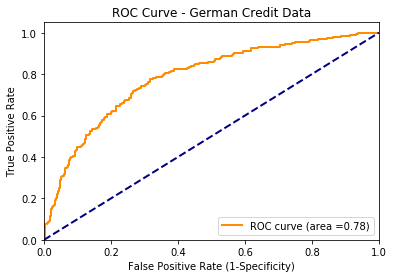

In [168]:
#Plotting the ROC curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_pred,pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area =%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - German Credit Data')
plt.legend(loc="lower right")
plt.show()

In [183]:
#determining the threshold for classification
y_tp = pd.concat([y_train,y_pred],axis=1)

for i in list(np.arange(0,1,0.1)):
    y_tp['y_pred'] = 0
    y_tp.loc[y_tp["Probability"] > i, 'y_pred'] = 1
    print ("Threshold",round(i,2),"Train Accuracy:",round(accuracy_score(y_tp['class'], y_tp['y_pred']),4))

    

Threshold 0.0 Train Accuracy: 0.2986
Threshold 0.1 Train Accuracy: 0.4757
Threshold 0.2 Train Accuracy: 0.6286
Threshold 0.3 Train Accuracy: 0.72
Threshold 0.4 Train Accuracy: 0.75
Threshold 0.5 Train Accuracy: 0.7629
Threshold 0.6 Train Accuracy: 0.7471
Threshold 0.7 Train Accuracy: 0.7243
Threshold 0.8 Train Accuracy: 0.71
Threshold 0.9 Train Accuracy: 0.7043


In [188]:
y_tp['y_pred']=0
y_tp.loc[y_tp["Probability"] > .5, 'y_pred'] = 1
print ("Threshold",round(.5,2),"Train Accuracy:",round(accuracy_score(y_tp['class'], y_tp['y_pred']),4))
print ("\nTrain Confusion Matrix\n\n", 
       pd.crosstab(y_tp['class'],y_tp['y_pred'], 
                   rownames = ["Actuall"],
                   colnames = ["Predicted"]))

Threshold 0.5 Train Accuracy: 0.7629

Train Confusion Matrix

 Predicted    0   1
Actuall           
0          444  47
1          119  90


In [202]:
#testing the model
x_test.shape
y_test.shape

y_pred_test = pd.DataFrame( 
    log_model.predict(
        sm.add_constant(x_test)))


In [203]:
y_pred_test.columns = ["Probability"]
y_tp_test = pd.concat([y_test,y_pred_test],axis=1)
y_tp_test["y_pred"] = 0
y_tp_test.loc[y_tp_test["Probability"] > 0.5, 'y_pred'] = 1
print("\nTest Confusion Matrix\n\n", 
       pd.crosstab( y_tp_test['class'],
                   y_tp_test['y_pred'],
                   rownames = ["Actuall"],
                   colnames = ["Predicted"]))
print("\nTest Accuracy:", 
      round(accuracy_score( y_tp_test['class'],
                           y_tp_test['y_pred']),
            4))


Test Confusion Matrix

 Predicted    0   1
Actuall           
0          193  16
1           56  35

Test Accuracy: 0.76
